In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn import model_selection,preprocessing,neighbors,metrics,svm,ensemble,tree

In [6]:
import xgboost

In [7]:
price=pd.read_csv('price.txt',header=None,
                  names=['小区','户型','房屋单价（元/m²）','位置','面积（平方米）','参考首付（万）','建造年代（年）','朝向','房屋类型','所在楼层','装修程度','产权(年)','电梯','房本年限（年）','产权性质','唯一住房','一手房源'])

In [8]:
price.head(5)

,小区,户型,房屋单价（元/m²）,位置,面积（平方米）,参考首付（万）,建造年代（年）,朝向,房屋类型,所在楼层,装修程度,产权(年),电梯,房本年限（年）,产权性质,唯一住房,一手房源
0,['所属小区:碧桂园城市花园','房屋户型:3室2厅1卫','房屋单价:15944元/m²','所在位置:增城－朱村－朱村街','建筑面积:94.1平方米','参考首付:45.00万','建造年代:2014年','房屋朝向:南','房屋类型:普通住宅','所在楼层:中层(共18层)','装修程度:精装修','产权年限:70年','配套电梯:有','房本年限:满二年','产权性质:商品房住宅','唯一住房:是','一手房源:否']
1,['所属小区:高晟广场小区','房屋户型:2室2厅1卫','房屋单价:7973元/m²','所在位置:花都－新区－迎宾大道163号','建筑面积:74平方米','参考首付:17.70万','建造年代:2010年','房屋朝向:南','房屋类型:普通住宅','所在楼层:中层(共9层)','装修程度:精装修','产权年限:70年','配套电梯:有','房本年限:满五年','产权性质:商品房住宅','唯一住房:是','一手房源:否']
2,['所属小区:广地花园','房屋户型:2室2厅1卫','房屋单价:30442元/m²','所在位置:番禺－华南－迎宾大道','建筑面积:87.4平方米','参考首付:79.80万','建造年代:2000年','房屋朝向:东南','房屋类型:普通住宅','所在楼层:低层(共19层)','装修程度:简单装修','产权年限:70年','配套电梯:有','房本年限:满二年','产权性质:商品房住宅','唯一住房:否','一手房源:否']
3,['所属小区:实地常春藤','房屋户型:3室2厅2卫','房屋单价:25104元/m²','所在位置:萝岗－萝岗－禾丰路','建筑面积:96平方米','参考首付:72.30万','建造年代:2019年','房屋朝向:南北','房屋类型:普通住宅','所在楼层:低层(共30层)','装修程度:精装修','产权年限:70年','配套电梯:有','房本年限:满五年','产权性质:商品房住宅','唯一住房:是','一手房源:否']
4,['所属小区:珠江铂世湾','房屋户型:3室2厅2卫','房屋单价:36735元/m²','所在位置:番禺－华南－兴南大道163号','建筑面积:98平方米','参考首付:108.00万','建造年代:2018年','房屋朝向:南','房屋类型:公寓','所在楼层:中层(共33层)','装修程度:精装修','产权年限:70年','配套电梯:有','房本年限:不满二年','产权性质:商品房住宅','唯一住房:是','一手房源:是']


In [9]:
price['小区']=price['小区'].str.findall("'所属小区:(.*?)'")
price['户型']=price['户型'].str.findall("'房屋户型:(.*?)'")
price['房屋单价（元/m²）']=price['房屋单价（元/m²）'].str.findall("'房屋单价:(.*?)元")
price['位置']=price['位置'].str.findall("'所在位置:(.*?)'")
price['面积（平方米）']=price['面积（平方米）'].str.findall("'建筑面积:(.*?)平方米'")
price['参考首付（万）']=price['参考首付（万）'].str.findall("'参考首付:(.*?)万")
price['建造年代（年）']=price['建造年代（年）'].str.findall("'建造年代:(.*?)年'")
price['朝向']=price['朝向'].str.findall("'房屋朝向:(.*?)'")
price['房屋类型']=price['房屋类型'].str.findall("'房屋类型:(.*?)'")
price['所在楼层']=price['所在楼层'].str.findall("'所在楼层:(.*?)'")
price['装修程度']=price['装修程度'].str.findall("'装修程度:(.*?)'")
price['产权(年)']=price['产权(年)'].str.findall("'产权年限:(.*?)年'")
price['电梯']=price['电梯'].str.findall("'配套电梯:(.*?)'")
price['房本年限（年）']=price['房本年限（年）'].str.findall("'房本年限:(.*?)'")
price['产权性质']=price['产权性质'].str.findall("'产权性质:(.*?)'")
price['唯一住房']=price['唯一住房'].str.findall("'唯一住房:(.*?)'")
price['一手房源']=price['一手房源'].str.findall("'一手房源:(.*?)'")

In [10]:
price.head()

,小区,户型,房屋单价（元/m²）,位置,面积（平方米）,参考首付（万）,建造年代（年）,朝向,房屋类型,所在楼层,装修程度,产权(年),电梯,房本年限（年）,产权性质,唯一住房,一手房源
0,[碧桂园城市花园],[3室2厅1卫],[15944],[增城－朱村－朱村街],[94.1],[45.00],[2014],[南],[普通住宅],[中层(共18层)],[精装修],[70],[有],[满二年],[商品房住宅],[是],[否]
1,[高晟广场小区],[2室2厅1卫],[7973],[花都－新区－迎宾大道163号],[74],[17.70],[2010],[南],[普通住宅],[中层(共9层)],[精装修],[70],[有],[满五年],[商品房住宅],[是],[否]
2,[广地花园],[2室2厅1卫],[30442],[番禺－华南－迎宾大道],[87.4],[79.80],[2000],[东南],[普通住宅],[低层(共19层)],[简单装修],[70],[有],[满二年],[商品房住宅],[否],[否]
3,[实地常春藤],[3室2厅2卫],[25104],[萝岗－萝岗－禾丰路],[96],[72.30],[2019],[南北],[普通住宅],[低层(共30层)],[精装修],[70],[有],[满五年],[商品房住宅],[是],[否]
4,[珠江铂世湾],[3室2厅2卫],[36735],[番禺－华南－兴南大道163号],[98],[108.00],[2018],[南],[公寓],[中层(共33层)],[精装修],[70],[有],[不满二年],[商品房住宅],[是],[是]


In [11]:
for col,item in price.iteritems():
    price[col]=item.str.get(0)
        

In [12]:
price.isnull().sum()

小区            0
户型            0
房屋单价（元/m²）    0
位置            0
面积（平方米）       0
参考首付（万）       0
建造年代（年）       0
朝向            0
房屋类型          0
所在楼层          0
装修程度          0
产权(年)         2
电梯            2
房本年限（年）       2
产权性质          2
唯一住房          2
一手房源          2
dtype: int64

In [13]:
price[price['产权(年)'].isnull()]

,小区,户型,房屋单价（元/m²）,位置,面积（平方米）,参考首付（万）,建造年代（年）,朝向,房屋类型,所在楼层,装修程度,产权(年),电梯,房本年限（年）,产权性质,唯一住房,一手房源
1715,万科海上传奇,2室2厅2卫,43333,荔湾－芳村－太和街,30,39.00,2015,西南,公寓,中层(共17层),精装修,NaN,NaN,NaN,NaN,NaN,NaN
2334,富泽居,2室2厅1卫,27632,番禺－大石－群贤路,76,63.00,2003,南北,普通住宅,低层(共6层),精装修,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
price.loc[[1715,2334],'产权(年)']=70
price.loc[[1715,2334],'电梯']=['有','无']
price.loc[[1715,2334],'房本年限（年）']="满五年"
price.loc[[1715,2334],'产权性质']=['商住两用','商品房住宅']
price.loc[[1715,2334],'唯一住房']=['是','否']
price.loc[[1715,2334],'一手房源']='否'

In [15]:
price.loc[[1715, 2334]]

,小区,户型,房屋单价（元/m²）,位置,面积（平方米）,参考首付（万）,建造年代（年）,朝向,房屋类型,所在楼层,装修程度,产权(年),电梯,房本年限（年）,产权性质,唯一住房,一手房源
1715,万科海上传奇,2室2厅2卫,43333,荔湾－芳村－太和街,30,39.00,2015,西南,公寓,中层(共17层),精装修,70,有,满五年,商住两用,是,否
2334,富泽居,2室2厅1卫,27632,番禺－大石－群贤路,76,63.00,2003,南北,普通住宅,低层(共6层),精装修,70,无,满五年,商品房住宅,否,否


In [16]:
price.isnull().sum()

小区            0
户型            0
房屋单价（元/m²）    0
位置            0
面积（平方米）       0
参考首付（万）       0
建造年代（年）       0
朝向            0
房屋类型          0
所在楼层          0
装修程度          0
产权(年)         0
电梯            0
房本年限（年）       0
产权性质          0
唯一住房          0
一手房源          0
dtype: int64

In [17]:
price['区域']=price['位置'].str.split('－').str.get(0)
price['街道/周边城市']=price['位置'].str.split('－').str.get(1)
price['街号']=price['位置'].str.split('－').str.get(2)

In [18]:
price.drop('位置',axis=1,inplace=True)

In [19]:
price['层数']=price['所在楼层'].str.findall("共(\d+)层").str.get(0)

In [20]:
price['所在楼层']=price['所在楼层'].str.slice(0,2)

In [21]:
price.loc[price['所在楼层'].str.contains('层')==False,'所在楼层']='低层'

In [22]:
price=price.reindex(columns=['小区','区域','街道/周边城市','街号','户型','面积（平方米）','建造年代（年）','朝向','房屋类型','层数','所在楼层','装修程度','电梯','产权(年)','产权性质','房本年限（年）','唯一住房','一手房源','房屋单价（元/m²）'])

In [23]:
price.head()

,小区,区域,街道/周边城市,街号,户型,面积（平方米）,建造年代（年）,朝向,房屋类型,层数,所在楼层,装修程度,电梯,产权(年),产权性质,房本年限（年）,唯一住房,一手房源,房屋单价（元/m²）
0,碧桂园城市花园,增城,朱村,朱村街,3室2厅1卫,94.1,2014,南,普通住宅,18,中层,精装修,有,70,商品房住宅,满二年,是,否,15944
1,高晟广场小区,花都,新区,迎宾大道163号,2室2厅1卫,74,2010,南,普通住宅,9,中层,精装修,有,70,商品房住宅,满五年,是,否,7973
2,广地花园,番禺,华南,迎宾大道,2室2厅1卫,87.4,2000,东南,普通住宅,19,低层,简单装修,有,70,商品房住宅,满二年,否,否,30442
3,实地常春藤,萝岗,萝岗,禾丰路,3室2厅2卫,96,2019,南北,普通住宅,30,低层,精装修,有,70,商品房住宅,满五年,是,否,25104
4,珠江铂世湾,番禺,华南,兴南大道163号,3室2厅2卫,98,2018,南,公寓,33,中层,精装修,有,70,商品房住宅,不满二年,是,是,36735


In [24]:
price.isnull().sum()

小区            0
区域            0
街道/周边城市       0
街号            0
户型            0
面积（平方米）       0
建造年代（年）       0
朝向            0
房屋类型          0
层数            0
所在楼层          0
装修程度          0
电梯            0
产权(年)         0
产权性质          0
房本年限（年）       0
唯一住房          0
一手房源          0
房屋单价（元/m²）    0
dtype: int64

In [25]:
price.dtypes

小区            object
区域            object
街道/周边城市       object
街号            object
户型            object
面积（平方米）       object
建造年代（年）       object
朝向            object
房屋类型          object
层数            object
所在楼层          object
装修程度          object
电梯            object
产权(年)         object
产权性质          object
房本年限（年）       object
唯一住房          object
一手房源          object
房屋单价（元/m²）    object
dtype: object

In [26]:
price['面积（平方米）']=price['面积（平方米）'].astype('float')
price['建造年代（年）']=price['建造年代（年）'].astype('int')
price['层数']=price['层数'].astype('int')
price['房屋单价（元/m²）']=price['房屋单价（元/m²）'].astype('int')


In [27]:
price.dtypes

小区             object
区域             object
街道/周边城市        object
街号             object
户型             object
面积（平方米）       float64
建造年代（年）         int32
朝向             object
房屋类型           object
层数              int32
所在楼层           object
装修程度           object
电梯             object
产权(年)          object
产权性质           object
房本年限（年）        object
唯一住房           object
一手房源           object
房屋单价（元/m²）      int32
dtype: object

In [28]:
price.duplicated().sum()

80

In [29]:
price.drop_duplicates(inplace=True)

In [30]:
price.shape

(2861, 19)

# 分析每个区域的房屋单价定价的情况




In [30]:
price.groupby('区域')['房屋单价（元/m²）'].mean().sort_values(ascending=False)

区域
天河      45821.811138
越秀      45315.336207
海珠      38893.585859
荔湾      32946.803922
番禺      25719.461728
萝岗      24813.729560
白云      24542.452991
黄埔      23696.307692
南沙      20117.328358
花都      16152.536481
增城      16122.720264
从化      13893.461538
广州周边     9846.876404
Name: 房屋单价（元/m²）, dtype: float64

In [31]:
price.groupby('区域')['房屋单价（元/m²）'].mean().sort_values(ascending=False).index.values

array(['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'], dtype=object)

In [32]:
plt.style.use('ggplot')

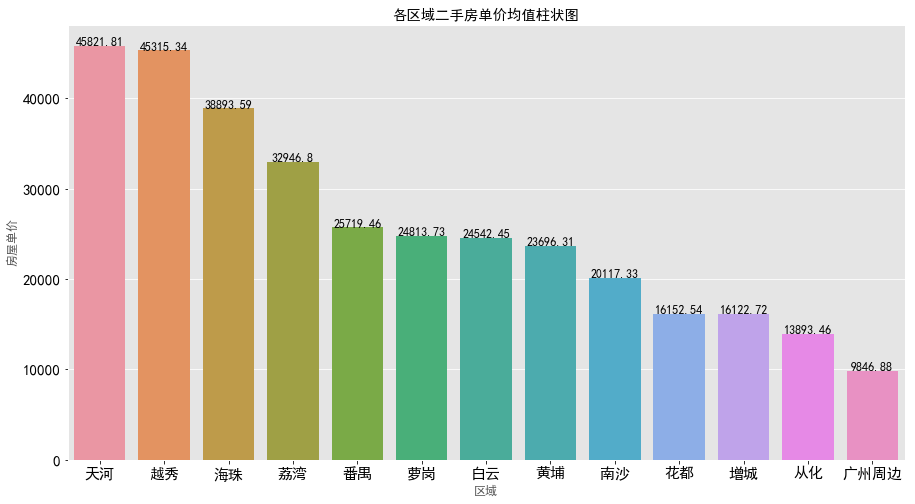

In [333]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x='区域',y='房屋单价（元/m²）',data=price,ci=0,ax=axes,order=['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'])
axes.tick_params(axis='y',labelsize=15,colors='black')
axes.tick_params(axis='x',labelsize=15,colors='black')
plt.ylabel('房屋单价')
plt.title('各区域二手房单价均值柱状图')
for name,value in enumerate(price.groupby('区域')['房屋单价（元/m²）'].mean().sort_values(ascending=False)):
    axes.text(x=name,y=value,s=round(value,2),ha='center',fontsize=12)

* 从柱状图可知，除去广州周边地区，天河区二手房单价定价均值最高，为45821.81元/平方米；从化区最低，为13893.46元/平方米。天河区、越秀区单价定价均值基本相等,均超40000元/平方米。广州市内从化，增城、花都区的二手房单价均价均不超20000元/平方米，可能因为这三个区域远离市中心。不包括三个郊区以及周边，广州全部区的二手房单价定价均价都已超20000元/平方米。




Text(0, 0.5, '房屋单价')

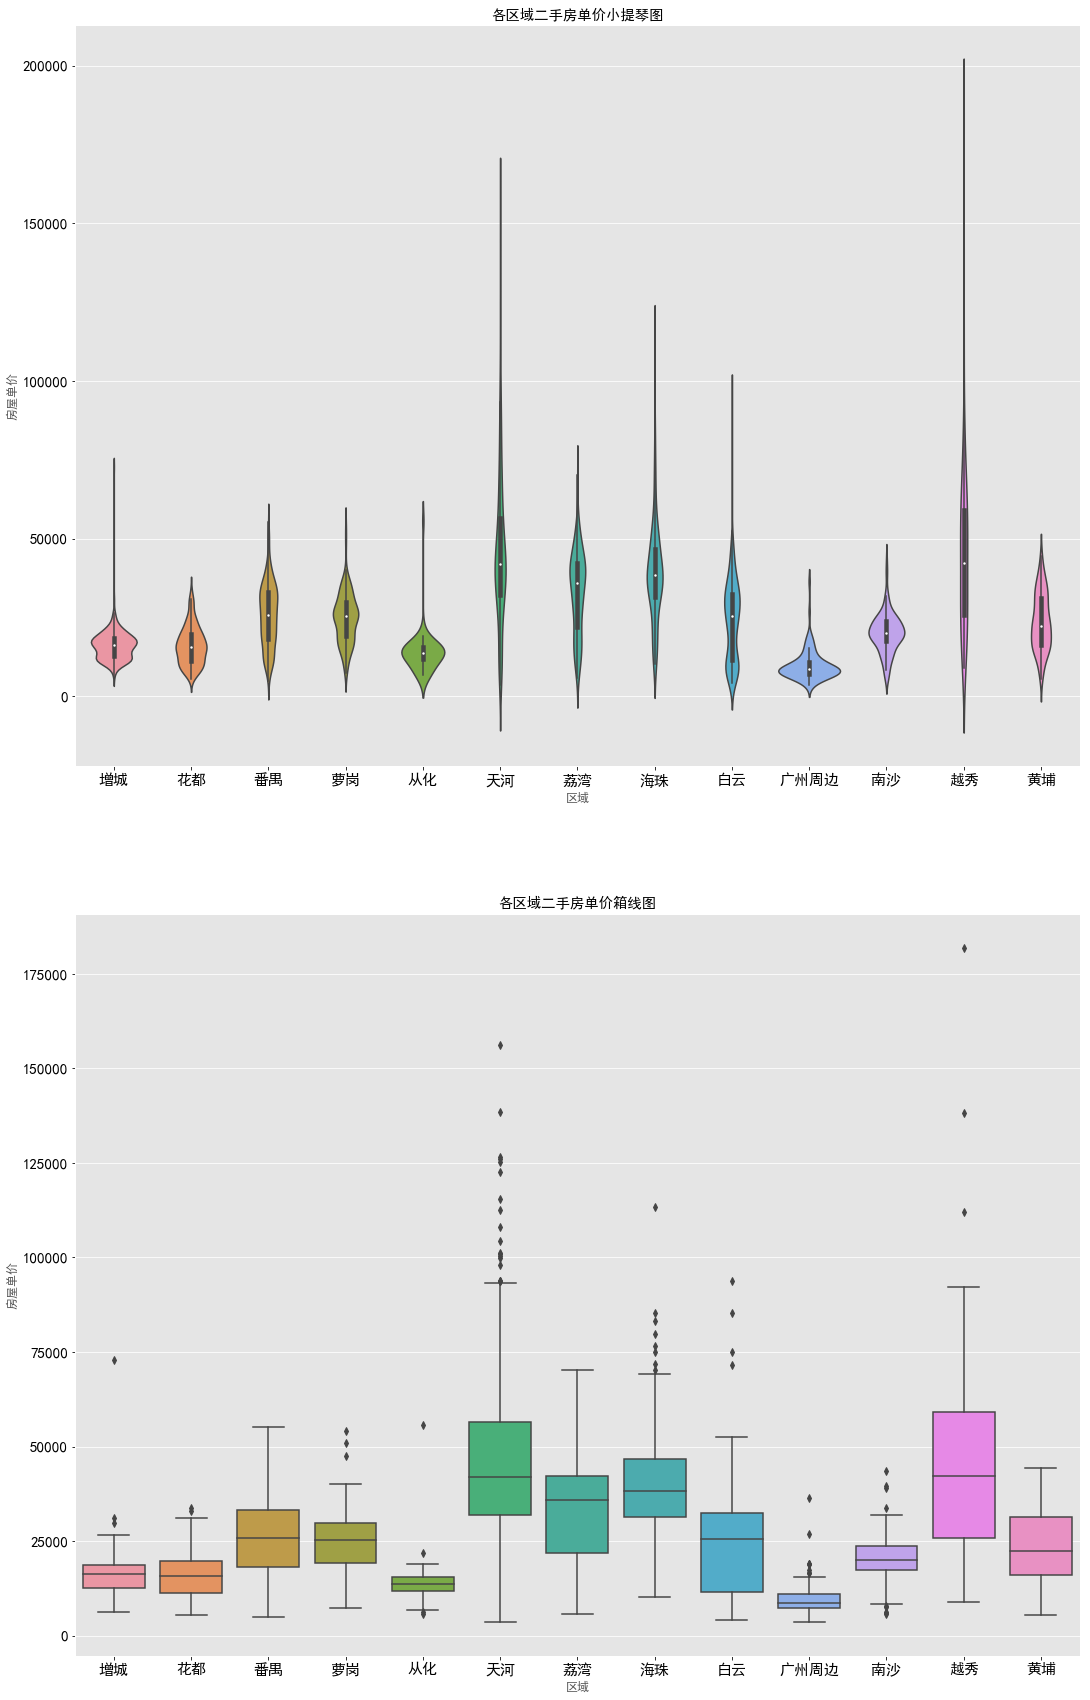

In [34]:
fig,axes=plt.subplots(2,1,figsize=(18,30))
sns.violinplot(x='区域',y='房屋单价（元/m²）',data=price,ax=axes[0])
axes[0].tick_params(axis='y',labelsize=15,colors='black')
axes[0].tick_params(axis='x',labelsize=15,colors='black')
axes[0].set_title('各区域二手房单价小提琴图')
axes[0].set_ylabel('房屋单价')
sns.boxplot(x='区域',y='房屋单价（元/m²）',data=price,ax=axes[1])
axes[1].tick_params(axis='y',labelsize=15,colors='black')
axes[1].tick_params(axis='x',labelsize=15,colors='black')
axes[1].set_title('各区域二手房单价箱线图')
axes[1].set_ylabel('房屋单价')

* 结合小提琴图和箱线图可以看到，各区域二手房均存在某些单价极高的单位，最高单价和最低单价相差极大，越秀区和天河区尤为突出，从化区极差最小。除了越秀区和天河区，其他区域大部分单位单价集中于低于50000元/平方米之内。大部分区域均存在单价为极大异常值的单位，但不包括番禺区、荔湾区、黄埔区。异于其他区域，从化区和南沙区存在单价为极小值异常值的单位。





# 分析每个区域的每条街道/周边城市的单价情况

In [35]:
price.groupby(['区域','街道/周边城市'])['房屋单价（元/m²）'].mean()

区域  街道/周边城市
从化  太平镇         13785.148148
    温泉          26789.000000
    街口中心区       13440.055556
    鳌头           6993.250000
南沙  万顷沙         16249.363636
    东涌          15679.000000
    大岗          13833.777778
    榄核           8421.000000
    进港大道        20892.300000
    金洲          21024.883333
    黄阁          21721.193548
增城  东进东路        24000.000000
    中新镇         15412.250000
    凤凰城         22942.846154
    增城周边        15680.600000
    广园东         19792.120000
    新塘          17625.689922
    新塘南         17458.250000
    新塘大道东       11798.727273
    朱村          16902.492537
    永和          14442.461538
    石滩          13177.777778
    荔城          13791.790476
    荔城增江        13484.307692
    荔城富鹏        11001.625000
天河  东圃          34336.412698
    东莞庄         54023.000000
    五山          57687.000000
    体育中心        33077.000000
    员村          37241.578947
                   ...      
越秀  东川          45184.333333
    东湖          46425.666667
    东风东         68747.500000
  

In [36]:
Ser1=price.groupby(['区域','街道/周边城市'])['房屋单价（元/m²）'].mean()

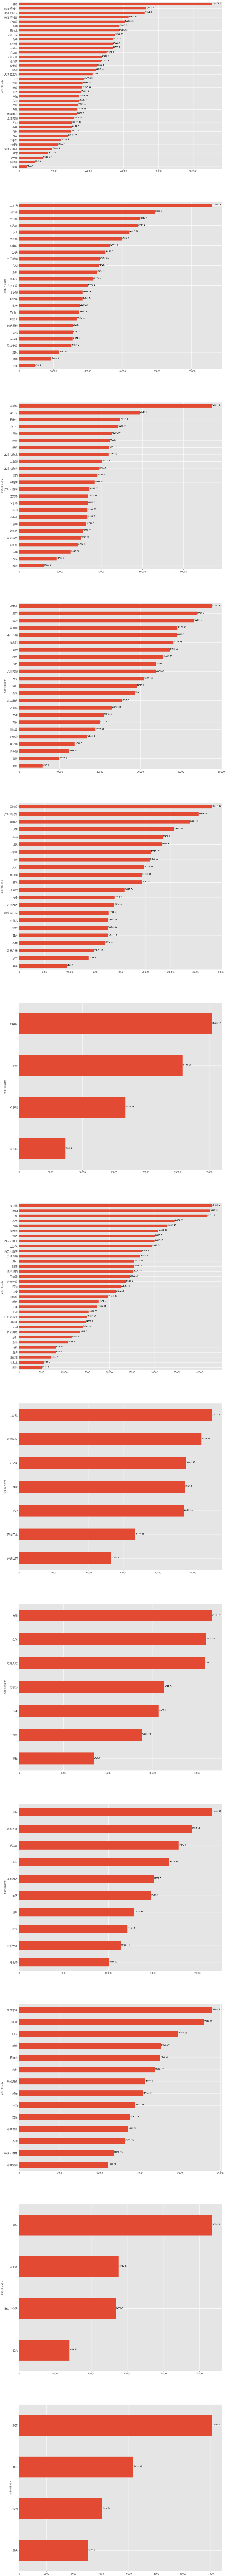

In [343]:
fig,axes=plt.subplots(13,1,figsize=(20,260))
Ser1['天河'].sort_values().plot(kind='barh',ax=axes[0],fontsize=15)
Ser1['越秀'].sort_values().plot(kind='barh',ax=axes[1],fontsize=15)
Ser1['海珠'].sort_values().plot(kind='barh',ax=axes[2],fontsize=15)
Ser1['荔湾'].sort_values().plot(kind='barh',ax=axes[3],fontsize=15)
Ser1['番禺'].sort_values().plot(kind='barh',ax=axes[4],fontsize=15)
Ser1['萝岗'].sort_values().plot(kind='barh',ax=axes[5],fontsize=15)
Ser1['白云'].sort_values().plot(kind='barh',ax=axes[6],fontsize=15)
Ser1['黄埔'].sort_values().plot(kind='barh',ax=axes[7],fontsize=15)
Ser1['南沙'].sort_values().plot(kind='barh',ax=axes[8],fontsize=15)
Ser1['花都'].sort_values().plot(kind='barh',ax=axes[9],fontsize=15)
Ser1['增城'].sort_values().plot(kind='barh',ax=axes[10],fontsize=15)
Ser1['从化'].sort_values().plot(kind='barh',ax=axes[11],fontsize=15)
Ser1['广州周边'].sort_values().plot(kind='barh',ax=axes[12],fontsize=15)
a=0
for i in ['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边']:
    for name,value in enumerate(Ser1[i].sort_values()):
        axes[a].text(x=value,y=name,s=round(value,2),ha='left',fontsize=12)
    a=a+1

* 先从均价最高的天河区看起，在天河区内，猎德的二手房单价均值超过10万元/平方米,与排第二的珠江新城中不超8万元/平方米的均价相比，猎德处于遥遥领先的位置，珠吉街道放出的盘均价最低，甚至不超1万元/平方米。除去猎德、珠江新城地区、龙怡路，其他街道均价都不超过6万元/平方米。
* 在越秀区中，二沙岛一枝独秀，单价均值超过10万元/平方米，三元里的二手房单价均值为最低。越秀区大部分地区均价低于6万元/平方米，不包括二沙岛、德政路、中山路、东方东路、小北路。
* 海珠区革新路均价超过8万元/平方米，接近10万元/平方米，为最高，剩下的街道无一均价超过6万元/平方米；官洲街道二手房的均价为最低，不超2万元/平方米，除此之外，沙园街道的均价亦不超2万元/平方米。纵观海珠区所有街道，大部分二手房单价均值在4万左右。
* 荔湾区所有街道二手房均价低于5万元/平方米，环市西最高，接近5万元/平方米，菊树街道的均值最低；一半左右的街道均价低于3万元/平方米，大部分街道均价低于4万元/平方米。
* 番禺区所有街道二手房均价低于4万元/平方米，最高为星河湾，最低为厦滘；只有星河湾、雅居乐超过3万5千元/平方米的单价均值，只有厦滘低于1万元/平方米。大部分街道二手房均价在1万8千元/平方米到3万元/平方米之间。
* 萝岗区的二手房信息中，只有科学城的单价均值超过3万元/平方米，最低的开发东区不超1万元/平方米。
* 白云区只有梅花园、南湖、江夏均价超4万元/平方米，其中梅花园为最高。鸦岗二手房单价均价在5000左右，为白云区中最低。白云区大部分街道不超3万元/平方米均价。
* 黄埔区大沙地均价最高，除了大沙地，黄埔区府外，其余街道均价不超2万5千元/平方米，大部分街道均价在1万7千元/平方米到2万5千元/平方米的区间内。
* 南沙区只有黄阁、金州、进港大道超过2万元/平方米均价，其中黄阁为最高。榄核的均价为南沙区最低，亦是唯一一个不超1万元/平方米的街道。
* 花都区大部分街道二手房均价在1万元/平方米到2万元/平方米的区间内，最高为中区，均价超过2万元/平方米，最低为建设路，均价在1万元/平方米左右。大部分街道均价低于1万7千元/平方米。
* 增城大部分街道二手房均价在1万5千元/平方米左右，最高为东进东路，均价超过2万元/平方米，凤凰城次之；最低为荔城富鹏，超过1万元/平方米。
* 从化区中，温泉地区均价超过2万5千元/平方米，遥遥领先其他街道，其他街道均不超1万5千元/平方米。鳌头最低，均价不超7千5元/平方米。
* 靠近广州的周边城市的某些地区二手房，只有东莞均价超1万7千5百元/平方米，最低的为肇庆，均价在6千元/平方米左右。佛山地区超过1万元/平方米，清远地区超过7千5百元/平方米。



# 分析每个区二手房建造年代对二手房单价均价的影响




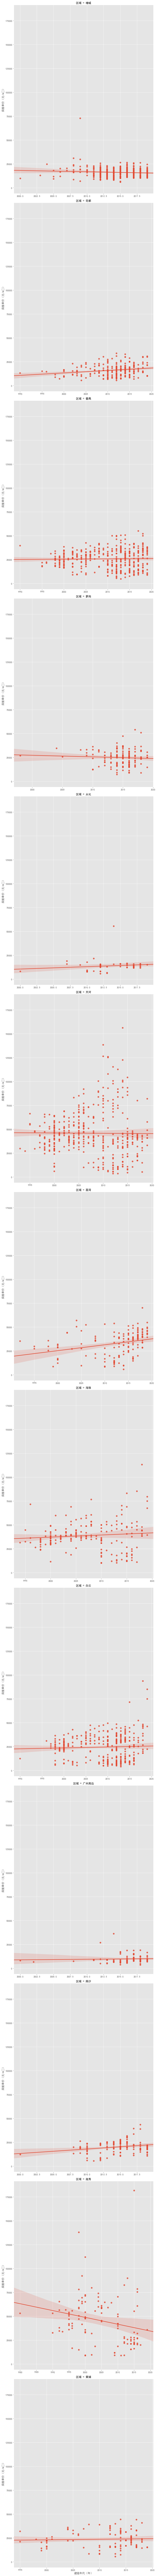

In [38]:
sns.lmplot(data=price,x='建造年代（年）',y='房屋单价（元/m²）',col='区域',sharex=False,col_wrap=1,height=12,aspect=0.8)


* 从各个区域二手房单价定价均值关于建造时间的散点图中可以发现，大部分区域近20年左右建造的房子，二手房单价定价均值浮动不大，即他们的定价与建造时间关系不大；但有些地区异于他们，例如，荔湾区、南沙区、海珠区近20年左右越迟建造的二手房单价定价越高；还有一个有趣的异类，越秀区二手房单价的定价居然随建造年代越早越高，越迟越低。

# 房子各朝向的房价单价定价情况

In [358]:
price.groupby('朝向')['房屋单价（元/m²）'].mean().sort_values(ascending=False)

朝向
西南    40815.456522
东西    40241.222222
东北    38453.791667
西     38074.925926
东     33287.223529
北     32589.355932
西北    32426.636364
南北    31148.946429
东南    29029.828042
南     23785.292874
Name: 房屋单价（元/m²）, dtype: float64

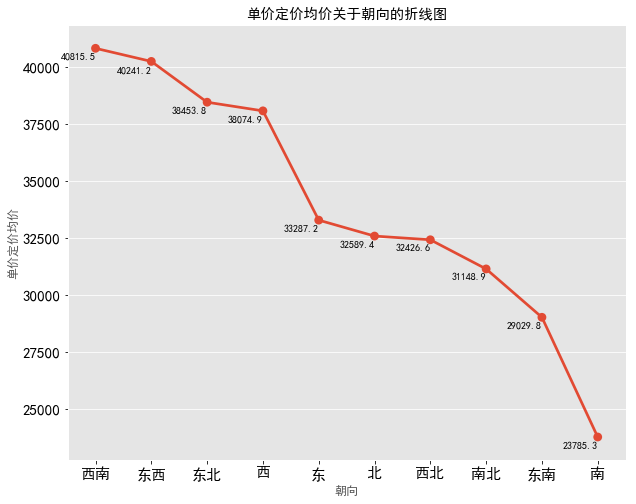

In [363]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.pointplot(x='朝向',y='房屋单价（元/m²）',data=price,ci=0,ax=axes,order=price.groupby('朝向')['房屋单价（元/m²）'].mean().sort_values(ascending=False).index)
axes.tick_params(axis='x',labelsize=15,colors='black')
axes.tick_params(axis='y',labelsize=15,colors='black')
axes.set_ylabel('单价定价均价')
axes.set_title('单价定价均价关于朝向的折线图')
for name,value in enumerate(price.groupby('朝向')['房屋单价（元/m²）'].mean().sort_values(ascending=False)):
    axes.text(x=name,y=value-500,s=round(value,1),ha='right',fontsize=10)

* 从东南西北四个朝向上看，朝西的定价最高，朝南的定价居然是最低的，与人们日常坐北向南观念相差较远，不过这只是综合全部二手房信息绘制的图，有可能定价高的地区，放出朝南向的二手楼盘的数目较少，而在定价低的地区与之相反。因此接下来对每个区分析朝向对定价的影响。

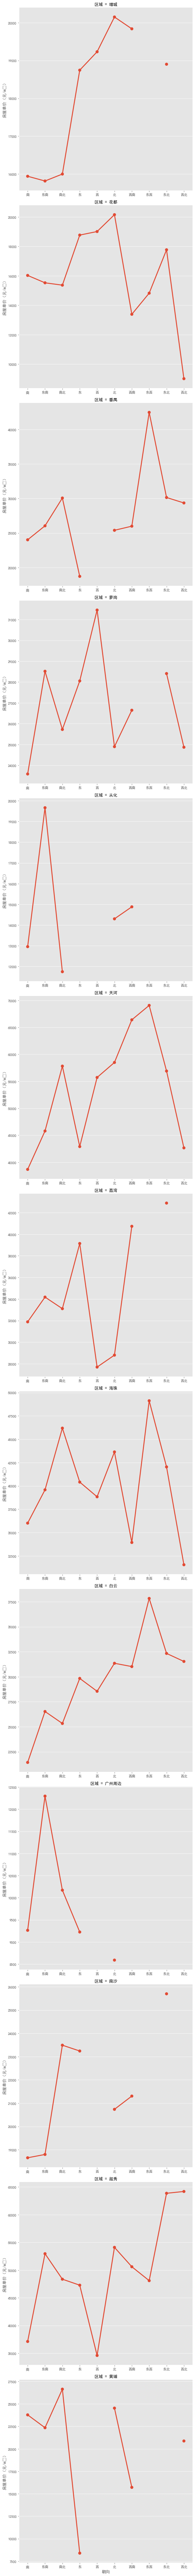

In [40]:
sns.catplot(data=price,x='朝向',y='房屋单价（元/m²）',col='区域',kind='point',
            ci=0,sharex=False,sharey=False,col_wrap=1,height=8,aspect=1)

* 从各区不同朝向二手房单价定价看，就东、南、西、北四个朝向中，大部分地区西或北朝向定价较高；
* 天河区东西向最高，南向最低
* 越秀区东北向最高，南向最低
* 海珠区东西向最高，东北向最低
* 白云区东西向最高，南向最低
* 荔湾区东北向最高，西向最低
* 黄埔区南北向最高，东向最低
* 南沙区东北向最高，南向最低
* 萝岗区西向最高，南向最低
* 番禺区东西向最高，东向最低
* 观察上面的朝向规律以及考虑各区的分布位置（忽略几个郊区和周边城市），可能朝向广州地标位置的二手房单价定价更高。

# 各区二手房是否有电梯的单价定价均值情况

In [346]:
price.pivot_table(index='区域',columns='电梯',values='房屋单价（元/m²）')

电梯,无,有
区域,,
从化,14319.600000,13848.127660
南沙,16793.000000,20193.458015
增城,21848.411765,15899.981693
天河,45774.981818,45829.005587
广州周边,14339.250000,9635.470588
海珠,31794.222222,40014.538012
番禺,25562.677083,25768.171521
白云,23856.462963,24667.178451
花都,13995.090909,16508.515000


In [349]:
price.pivot_table(index='区域',columns='电梯',values='房屋单价（元/m²）')['无'].reindex(['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'])

区域
天河      45774.981818
越秀      51676.523810
海珠      31794.222222
荔湾      26528.529412
番禺      25562.677083
萝岗      22994.500000
白云      23856.462963
黄埔      21922.125000
南沙      16793.000000
花都      13995.090909
增城      21848.411765
从化      14319.600000
广州周边    14339.250000
Name: 无, dtype: float64

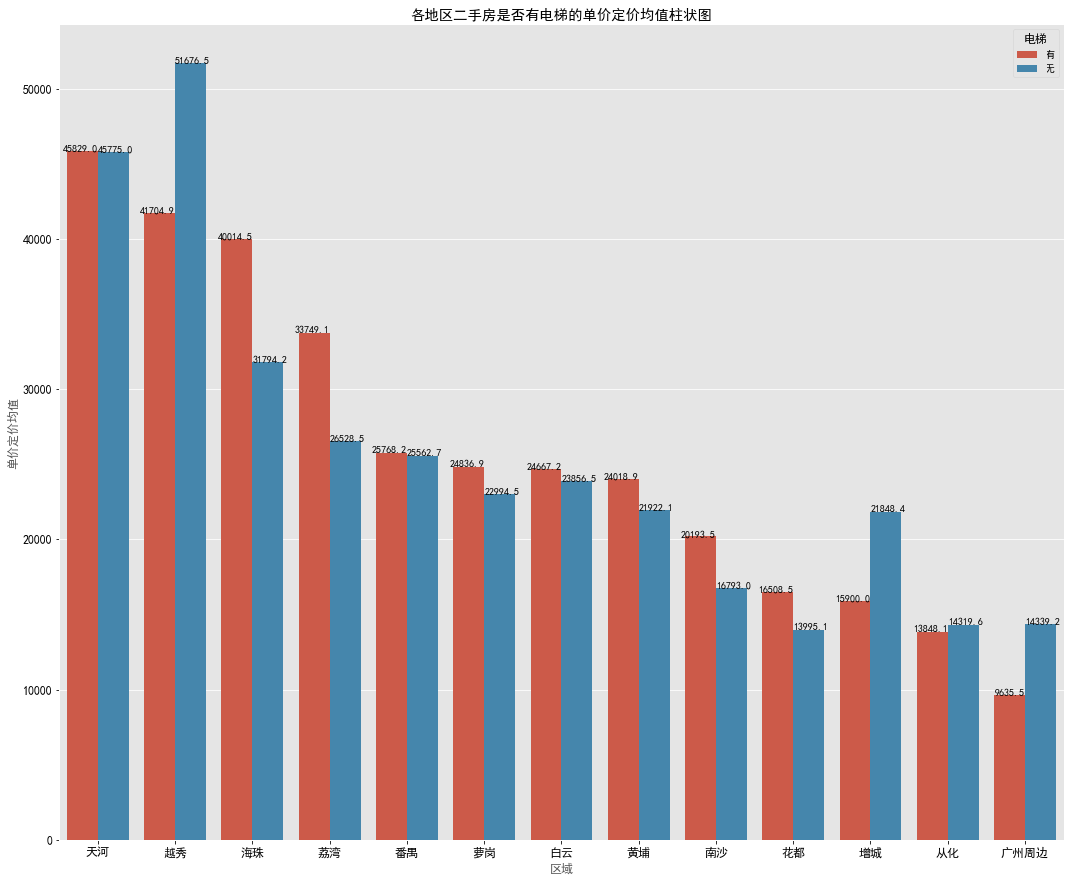

In [354]:
fig,axes=plt.subplots(1,1,figsize=(18,15))
sns.barplot(data=price,x='区域',y='房屋单价（元/m²）',ci=0,hue='电梯',ax=axes,order=['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'])
axes.tick_params(axis='x',labelsize=12,colors='black')
axes.tick_params(axis='y',labelsize=12,colors='black')
axes.set_ylabel('单价定价均值')
axes.set_title('各地区二手房是否有电梯的单价定价均值柱状图')
for name,value in enumerate(price.pivot_table(index='区域',columns='电梯',values='房屋单价（元/m²）')['无'].reindex(['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'])):
    axes.text(x=name,y=value,s=round(value,1),ha='left',fontsize=10)
for name,value in enumerate(price.pivot_table(index='区域',columns='电梯',values='房屋单价（元/m²）')['有'].reindex(['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'])):
    axes.text(x=name,y=value,s=round(value,1),ha='right',fontsize=10)

* 从柱状图可以看出，越秀区、增城区、从化区、广州周边的二手房当中没有电梯的定价要比有电梯的定价高；天河区的二手房有没电梯定价基本一致；其余各区均是有电梯的二手房定价要比没有电梯的二手房定价高。

# 各区二手房单价定价均值关于层数及所在楼层的散点图

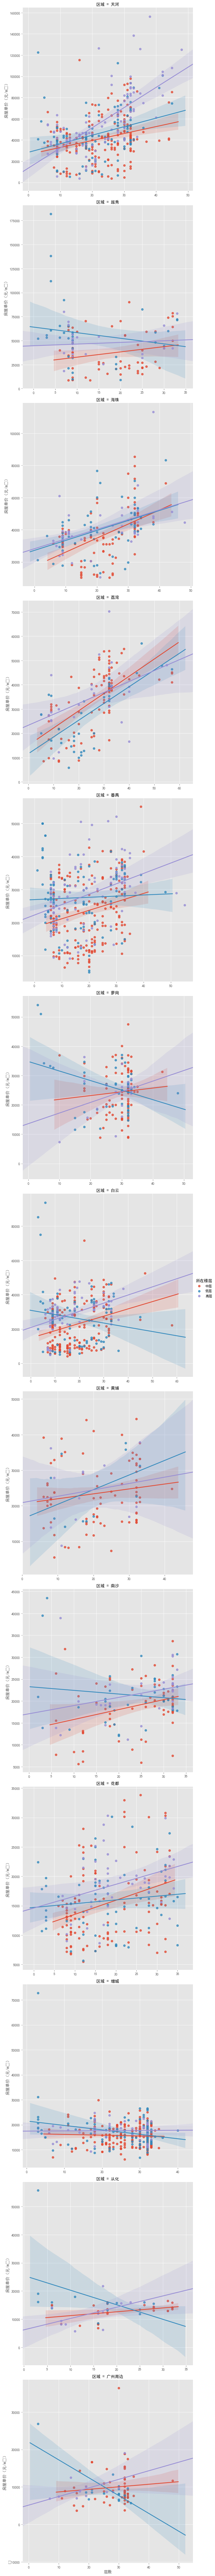

In [42]:
sns.lmplot(data=price,x='层数',y='房屋单价（元/m²）',sharex=False,sharey=False,hue='所在楼层',col='区域',
           col_order=['天河', '越秀', '海珠', '荔湾', '番禺', '萝岗', '白云', '黄埔', '南沙', '花都', '增城',
       '从化', '广州周边'],col_wrap=1,height=8)

* 天河区的二手房无伦处于高层、中层还是低层，单价定价均值均随着此楼盘具有的层数增加而增大，处于高层的二手房尤为突出。
* 越秀区、萝岗区、白云区、南沙区、从化区、广州周边地区处于中层和高层的二手房单价定价均值随楼盘层数增加而增大，但处于低层的楼盘与之相反，随层数增加，定价降低。
* 海珠区、荔湾区处于高层、中层、低层的二手房定价随层数增加而增大，三者走势基本一致。
* 番禺区处于高层、中层的二手房单价定价均值随楼盘层数增加而增大，处于低层的则随楼盘层数增加变化不大。
* 黄埔区的二手房单价定价均值均随层数增加而增大，处于低层的二手房尤为突出。
* 花都区的二手房单价定价均值均随层数增加而增大，处于中层的二手房尤为突出。
* 增城区处于中层、高层的二手房单价定价均值基本不随层数增加而增大，但处于低层的楼盘定价会随层数增大而下降。


# 是否存在电梯的情况下，楼盘层数以及所处楼层对单价定价的影响，取定价均价前五的区域进行分析。

In [355]:
df1=price.loc[price['区域']=='天河',['区域','所在楼层','层数','电梯','房屋单价（元/m²）']]
df2=price.loc[price['区域']=='越秀',['区域','所在楼层','层数','电梯','房屋单价（元/m²）']]
df3=price.loc[price['区域']=='海珠',['区域','所在楼层','层数','电梯','房屋单价（元/m²）']]
df4=price.loc[price['区域']=='荔湾',['区域','所在楼层','层数','电梯','房屋单价（元/m²）']]
df5=price.loc[price['区域']=='番禺',['区域','所在楼层','层数','电梯','房屋单价（元/m²）']]

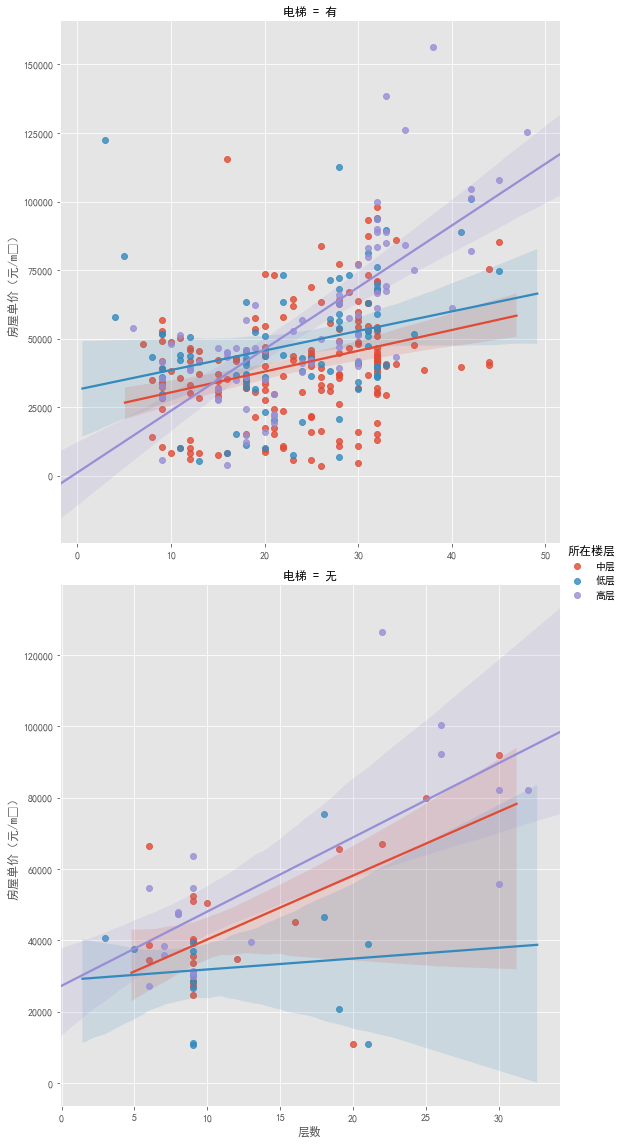

In [44]:
sns.lmplot(data=df1,x='层数',y='房屋单价（元/m²）',hue='所在楼层',col='电梯',col_wrap=1,height=8,sharex=False,sharey=False)

* 天河区有电梯的二手房定价均随层数增加而增高，处于高层的二手房尤为突出；而没电梯的二手房当中，处于高层、中层的二手房定价亦随层数而增高，但处于低层的变化却不大。

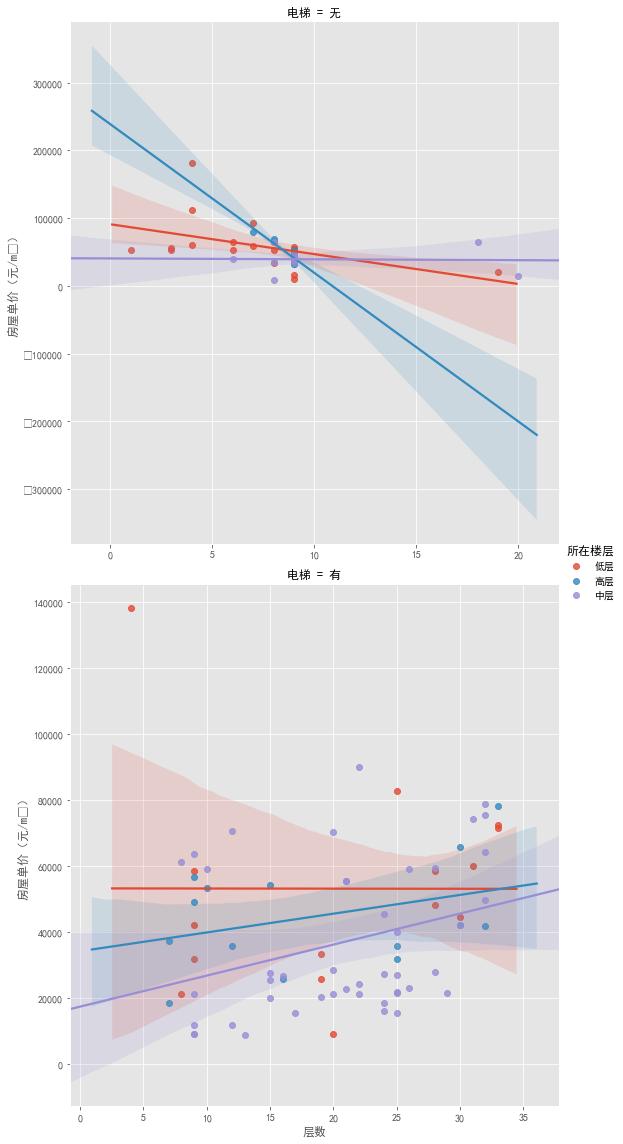

In [45]:
sns.lmplot(data=df2,x='层数',y='房屋单价（元/m²）',hue='所在楼层',col='电梯',
           col_wrap=1,height=8,sharex=False,sharey=False)

* 越秀区无电梯，处于楼盘中层的二手房单价定价基本不随楼盘层数增加而变化，但处于楼盘低层、高层的均随楼盘层数增加而降低，高层在此方面尤为突出。有电梯的二手房中，处于低层的基本不随层数增大而变化，处于高层、中层的随层数增大而增高。

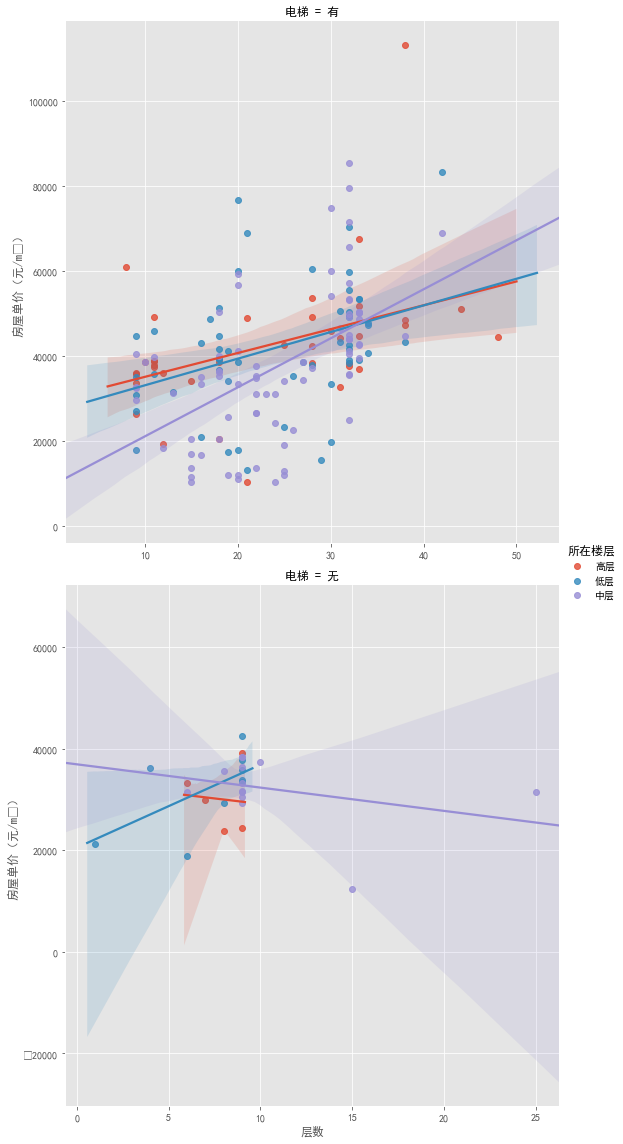

In [46]:
sns.lmplot(data=df3,x='层数',y='房屋单价（元/m²）',hue='所在楼层',col='电梯',col_wrap=1,height=8,sharex=False,sharey=False)

* 海珠区有电梯的二手房定价均随层数增加而增高；无电梯，处于低层的二手房定价随楼盘层数增加而增高，高层和中层则与之相反。

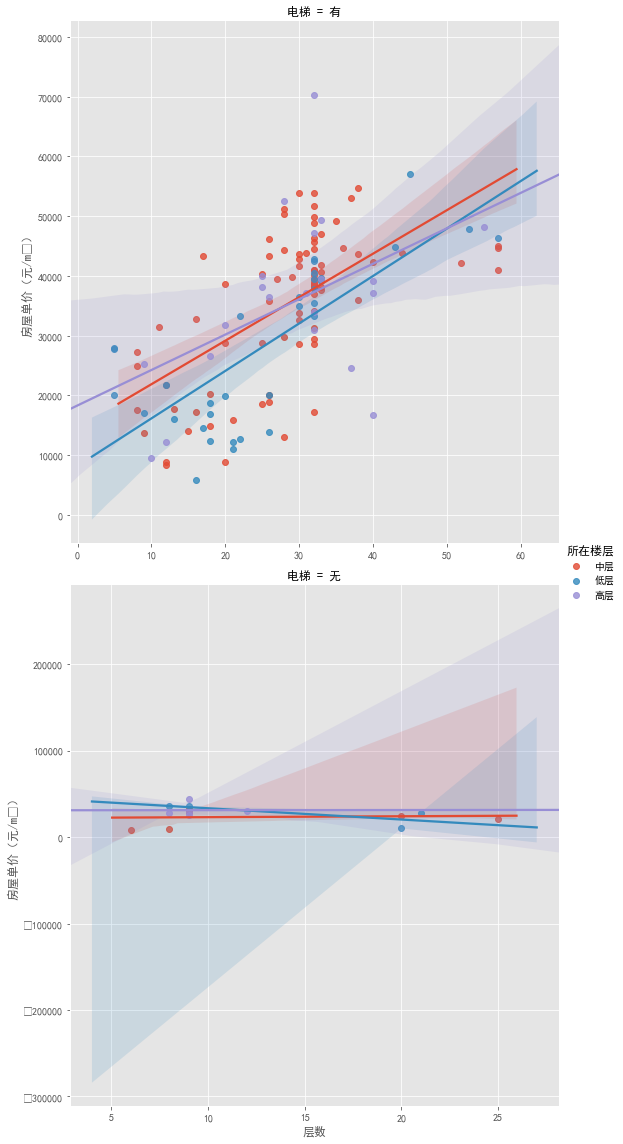

In [47]:
sns.lmplot(data=df4,x='层数',y='房屋单价（元/m²）',hue='所在楼层',col='电梯',col_wrap=1,height=8,sharex=False,sharey=False)

* 荔湾区有电梯的二手房定价均随层数增加而增高，无电梯的二手房定价除了处于低层的楼盘随层数增加而降低，其他基本不随层数增加有太大的变化。

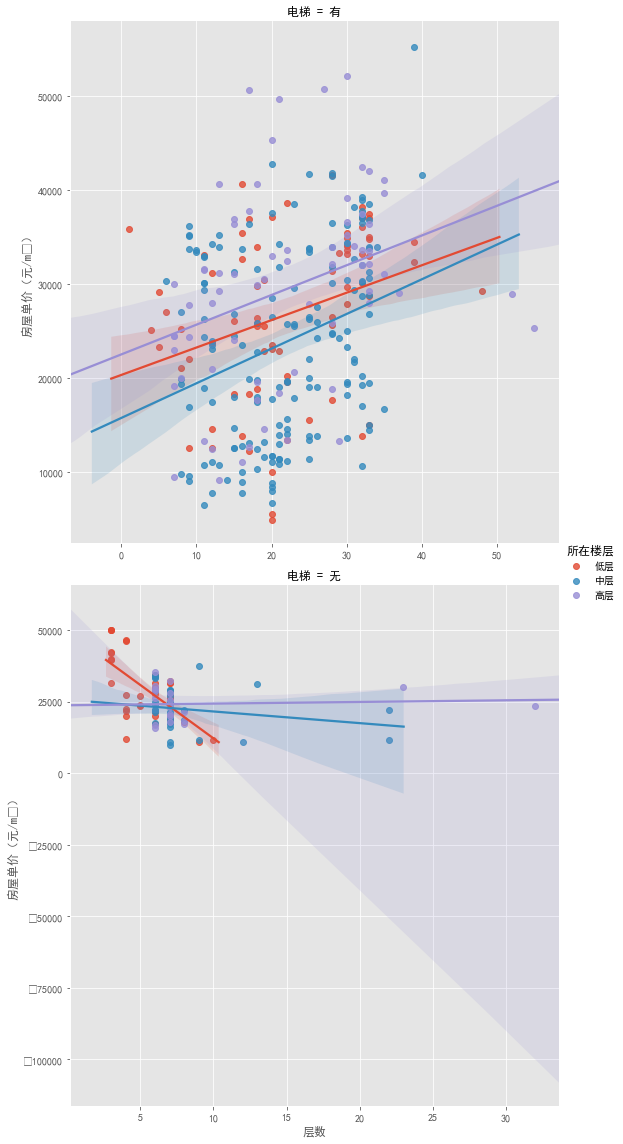

In [48]:
sns.lmplot(data=df5,x='层数',y='房屋单价（元/m²）',hue='所在楼层',col='电梯',col_wrap=1,height=8,sharex=False,sharey=False)

* 番禺区有电梯的二手房定价均随层数增加而增高，无电梯的二手房中，除处于高层的楼盘定价基本不随层数变化而变化，其他情况均随层数增加而降低，低层的情况较突出。

# 不同装修程度的二手房单价定价均价情况

In [327]:
price.groupby('装修程度')['房屋单价（元/m²）'].mean().sort_values(ascending=False)

装修程度
豪华装修    37658.143939
简单装修    34248.767857
毛坯      26852.819820
精装修     25263.940318
Name: 房屋单价（元/m²）, dtype: float64

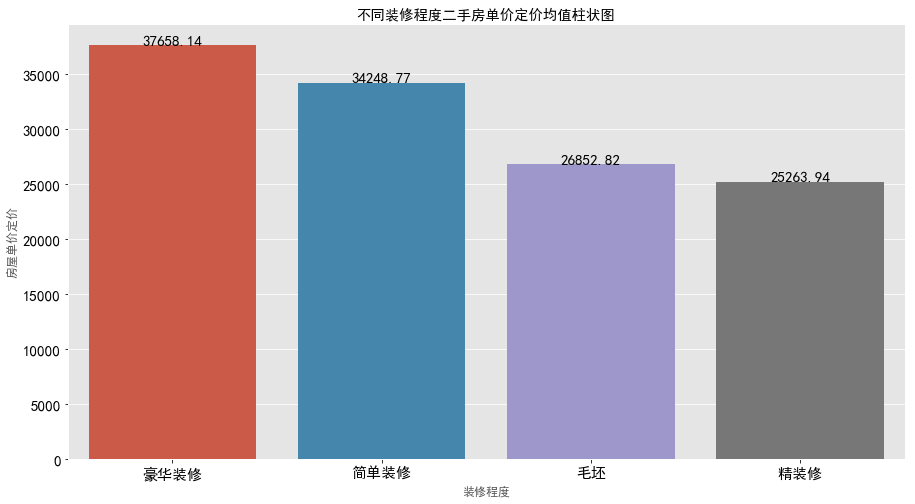

In [331]:
fig,axes=plt.subplots(1,1,figsize=(15,8))
sns.barplot(x='装修程度',y='房屋单价（元/m²）',data=price,ci=0,ax=axes,order=price.groupby('装修程度')['房屋单价（元/m²）'].mean().sort_values(ascending=False).index)
axes.tick_params(axis='y',labelsize=15,colors='black')
axes.tick_params(axis='x',labelsize=15,colors='black')
plt.ylabel('房屋单价定价')
plt.title('不同装修程度二手房单价定价均值柱状图')
for name,value in enumerate(price.groupby('装修程度')['房屋单价（元/m²）'].mean().sort_values(ascending=False)):
    axes.text(x=name,y=value,s=round(value,2),ha='center',fontsize=15)

* 从柱状图可以看出，豪华装修过的二手房单价定价均值最高，超过了3万5千元/平方米；精装修最低，在2万5千元/平方米左右。

# 建模

In [31]:
data=price.copy()

In [32]:
data.drop(['小区','街号','产权(年)'],axis=1,inplace=True)

In [33]:
def change_dtype(x):
    if x.dtype=='object':
        return pd.factorize(x)[0]
    else:
        return x

In [34]:
data=data.apply(change_dtype)

In [35]:
data.dtypes

区域              int64
街道/周边城市         int64
户型              int64
面积（平方米）       float64
建造年代（年）         int32
朝向              int64
房屋类型            int64
层数              int32
所在楼层            int64
装修程度            int64
电梯              int64
产权性质            int64
房本年限（年）         int64
唯一住房            int64
一手房源            int64
房屋单价（元/m²）      int32
dtype: object

In [36]:
data.describe()

,区域,街道/周边城市,户型,面积（平方米）,建造年代（年）,朝向,房屋类型,层数,所在楼层,装修程度,电梯,产权性质,房本年限（年）,唯一住房,一手房源,房屋单价（元/m²）
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,4.743097,56.573925,3.893743,93.847885,2010.927997,1.167424,0.154841,21.895841,0.626704,0.379238,0.129675,0.121985,0.765117,0.236631,0.160433,27172.726319
std,3.614857,50.623054,6.731818,50.869474,6.280371,1.952657,0.440282,9.914512,0.771729,0.808073,0.336004,0.372305,0.668512,0.426730,0.367072,17601.167773
min,0.000000,0.000000,0.000000,13.000000,1980.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3590.000000
25%,2.000000,17.000000,1.000000,71.300000,2007.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15006.000000
50%,5.000000,43.000000,2.000000,88.000000,2013.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,22632.000000
75%,8.000000,88.000000,4.000000,101.400000,2016.000000,2.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,35385.000000
max,12.000000,213.000000,54.000000,580.000000,2019.000000,9.000000,4.000000,58.000000,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,1.000000,181818.000000


In [37]:
X=data.drop('房屋单价（元/m²）',axis=1)

In [38]:
X=preprocessing.minmax_scale(X)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [39]:
X=pd.DataFrame(X,columns=data.drop('房屋单价（元/m²）',axis=1).columns)

In [170]:
## X=preprocessing.minmax_scale(X[['面积（平方米）','层数']])

## X=pd.DataFrame(X,columns=['面积（平方米）','层数'],index=data.index)

## X=pd.concat([data.drop(['面积（平方米）','层数','房屋单价（元/m²）'],axis=1),X],axis=1)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [40]:
X.describe()

,区域,街道/周边城市,户型,面积（平方米）,建造年代（年）,朝向,房屋类型,层数,所在楼层,装修程度,电梯,产权性质,房本年限（年）,唯一住房,一手房源
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.00000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,0.395258,0.265605,0.072106,0.142589,0.793026,0.129714,0.03871,0.366594,0.313352,0.126413,0.129675,0.040662,0.382559,0.118315,0.160433
std,0.301238,0.237667,0.124663,0.089717,0.161035,0.216962,0.11007,0.173939,0.385865,0.269358,0.336004,0.124102,0.334256,0.213365,0.367072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.079812,0.018519,0.102822,0.692308,0.000000,0.00000,0.192982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.416667,0.201878,0.037037,0.132275,0.846154,0.000000,0.00000,0.385965,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.666667,0.413146,0.074074,0.155908,0.923077,0.222222,0.00000,0.543860,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,data['房屋单价（元/m²）'],test_size=0.2,random_state=1234)

In [42]:
Y_train=np.log1p(y_train)
Y_test=np.log1p(y_test)

In [43]:
k=np.ceil(np.log2(x_train.shape[0]))

In [44]:
K=np.arange(1,k+1).astype('int')
K

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [45]:
params={'n_neighbors':K}

In [46]:
knn_grid=model_selection.GridSearchCV(estimator=neighbors.KNeighborsRegressor(weights='distance'),cv=5,param_grid=params,
                                      scoring='neg_mean_squared_error',n_jobs=2,verbose=1)

In [47]:
knn_grid.fit(x_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    9.0s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   10.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [48]:
knn_grid.best_params_

{'n_neighbors': 12}

In [49]:
knn_model=neighbors.KNeighborsRegressor(n_neighbors=12,weights='distance')

In [50]:
knn_model.fit(x_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=12, p=2,
          weights='distance')

In [51]:
pred=knn_model.predict(x_test)

In [52]:
metrics.mean_squared_error(Y_test,pred)

0.2241786782096243

# SVM

In [60]:
C=np.logspace(-2,3,6)
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [61]:
gamma=np.logspace(-2,3,6)

In [62]:
epsilon=np.arange(0.1,1.6,0.2)

In [63]:
params={'C':C,'gamma':gamma,'epsilon':epsilon}

In [64]:
svm_grid1=model_selection.GridSearchCV(estimator=svm.SVR(kernel='rbf'),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=1,n_jobs=2)

In [65]:
svm_grid1.fit(x_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.9s
[Parallel(n_jobs=2)]: Done 525 tasks      | elapsed:   44.8s
[Parallel(n_jobs=2)]: Done 1081 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 1440 out of 1440 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'epsilon': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [66]:
svm_grid1.best_params_

{'C': 1.0, 'epsilon': 0.30000000000000004, 'gamma': 1.0}

In [73]:
svm_model1=svm.SVR(epsilon=0.3,C=1,gamma=1,kernel='rbf')

In [74]:
svm_model1.fit(x_train,Y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
metrics.mean_squared_error(Y_test,svm_model1.predict(x_test))

0.20869983167982561

In [87]:
svm_pred=svm_model1.predict(x_test)

In [88]:
pd.DataFrame({'实际':np.expm1(Y_test),'预测':np.expm1(svm_pred)})

,实际,预测
469,31962.0,30812.331053
2780,9524.0,19253.508224
2408,10000.0,14825.975904
1032,15000.0,22501.671591
1748,12280.0,13803.869503
770,20437.0,17876.594587
1102,35400.0,36154.773107
1751,23600.0,28645.809589
2330,11494.0,14764.200256
2472,18795.0,18213.073762


# adaboost

In [89]:
max_depth=np.arange(3,11)
min_samples_split=[2,3,4,6,8,12]
min_samples_leaf=[2,3,4,6,8]

In [90]:
learning_rate=[0.1,1,5,10]
n_estimator=[200,300,400,500]

In [91]:
params={'base_estimator__max_depth':max_depth,'base_estimator__min_samples_split':min_samples_split,'base_estimator__min_samples_leaf':min_samples_leaf}

In [92]:
adaboost_grid=model_selection.GridSearchCV(estimator=ensemble.AdaBoostRegressor(base_estimator=tree.DecisionTreeRegressor()),
                                          param_grid=params,scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=2)

In [93]:
adaboost_grid.fit(x_train,Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   20.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   52.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'base_estimator__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'base_estimator__min_samples_split': [2, 3, 4, 6, 8, 12], 'base_estimator__min_samples_leaf': [2, 3, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [94]:
adaboost_grid.best_params_

{'base_estimator__max_depth': 10,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 2}

In [95]:
params={'learning_rate':learning_rate,'n_estimators':n_estimator}

In [96]:
adaboost_grid1=model_selection.GridSearchCV(estimator=ensemble.AdaBoostRegressor(base_estimator=tree.DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=2)),
                                          param_grid=params,scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=2)

In [97]:
adaboost_grid1.fit(x_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:  1.4min finished
F:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'learning_rate': [0.1, 1, 5, 10], 'n_estimators': [200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [98]:
adaboost_grid1.best_params_

{'learning_rate': 1, 'n_estimators': 400}

In [102]:
learning_rate=np.arange(0.1,1.1,0.1)

In [103]:
params={'learning_rate':learning_rate}

In [106]:
adaboost_grid2=model_selection.GridSearchCV(estimator=ensemble.AdaBoostRegressor(base_estimator=tree.DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=2),n_estimators=400),
                                          param_grid=params,scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=2)

In [107]:
adaboost_grid2.fit(x_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [108]:
adaboost_grid2.best_params_

{'learning_rate': 1.0}

In [109]:
adaboost_model=ensemble.AdaBoostRegressor(base_estimator=tree.DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=2),n_estimators=400,learning_rate=1)

In [110]:
adaboost_model.fit(x_train,Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1, loss='linear', n_estimators=400,
         random_state=None)

In [111]:
metrics.mean_squared_error(Y_test,adaboost_model.predict(x_test))

0.11157902244769535

# XGBoost

In [373]:
xgboost_model=xgboost.XGBRegressor(max_depth=8)

In [374]:
xgboost_model.fit(x_train,Y_train)

F:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:17:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [375]:
metrics.mean_squared_error(Y_test,xgboost_model.predict(x_test))

0.10492174193939884

In [376]:
metrics.mean_squared_error(Y_train,xgboost_model.predict(x_train))

0.020913212243764353

In [126]:
learning_rate=np.arange(0.1,0.5,0.1)
n_estimators=[100,200,300,400,500]

In [127]:
params={'learning_rate':learning_rate,'n_estimators':n_estimators}

In [128]:
xgboost_grid=model_selection.GridSearchCV(estimator=xgboost.XGBRegressor(),param_grid=params,cv=5,scoring='neg_mean_squared_error',
                                         verbose=1,n_jobs=2)

In [129]:
xgboost_grid.fit(x_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   19.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   40.1s finished
F:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:23:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4]), 'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [130]:
xgboost_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [135]:
subsample=[0.6,0.7,0.8,0.9,1]
colsample_bytree=[0.6,0.7,0.8,0.9,1]

In [136]:
params={'subsample':subsample,'colsample_bytree':colsample_bytree}

In [137]:
xgboost_grid=model_selection.GridSearchCV(estimator=xgboost.XGBRegressor(n_estimators=500),param_grid=params,cv=5,scoring='neg_mean_squared_error',
                                         verbose=1,n_jobs=2)

In [138]:
xgboost_grid.fit(x_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   31.6s
[Parallel(n_jobs=2)]: Done 125 out of 125 | elapsed:  1.4min finished
F:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:37:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [139]:
xgboost_grid.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.8}

In [140]:
max_depth=np.arange(3,11)
min_child_weight=[1,3,5,10,50]
gamma=[0,1,2,4,6,10,20]

In [141]:
params={'max_depth':max_depth,'min_child_weight':min_child_weight,'gamma':gamma}

In [142]:
xgboost_grid=model_selection.GridSearchCV(estimator=xgboost.XGBRegressor(n_estimators=500,colsample_bytree=0.7,subsample=0.8),param_grid=params,cv=5,scoring='neg_mean_squared_error',
                                         verbose=1,n_jobs=2)

In [143]:
xgboost_grid.fit(x_train,Y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   29.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  6.9min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 12.5min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 19.3min
[Parallel(n_jobs=2)]: Done 1400 out of 1400 | elapsed: 22.0min finished
F:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:01:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'min_child_weight': [1, 3, 5, 10, 50], 'gamma': [0, 1, 2, 4, 6, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [144]:
xgboost_grid.best_params_

{'gamma': 0, 'max_depth': 4, 'min_child_weight': 3}

In [145]:
xgboost_model=xgboost.XGBRegressor(max_depth=4,subsample=0.8,colsample_bytree=0.7,min_child_weight=3,n_estimators=500)

In [146]:
xgboost_model.fit(x_train,Y_train)

F:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:04:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=3, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [147]:
metrics.mean_squared_error(Y_test,xgboost_model.predict(x_test))

0.10039995094395733

In [148]:
metrics.mean_squared_error(Y_train,xgboost_model.predict(x_train))

0.028944565997388556